# Parts of Speech

Here, we'll be using the NLTK to guess the parts of speech for our texts. Common parts of speech for English include nouns (people, places, things), verbs (actions), and adjectives (descriptions). Here's a more complete list of parts of speech, taken from [this UPenn page](https://ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). The abbreviations here are those used by the NLTK POS tagger, `nltk.pos_tag()`. 

1.	CC	Coordinating conjunction
2.	CD	Cardinal number
3.	DT	Determiner
4.	EX	Existential there
5.	FW	Foreign word
6.	IN	Preposition or subordinating conjunction
7.	JJ	Adjective
8.	JJR	Adjective, comparative
9.	JJS	Adjective, superlative
10.	LS	List item marker
11.	MD	Modal
12.	NN	Noun, singular or mass
13.	NNS	Noun, plural
14.	NNP	Proper noun, singular
15.	NNPS	Proper noun, plural
16.	PDT	Predeterminer
17.	POS	Possessive ending
18.	PRP	Personal pronoun
19.	PRP\$	Possessive pronoun
20.	RB	Adverb
21.	RBR	Adverb, comparative
22.	RBS	Adverb, superlative
23.	RP	Particle
24.	SYM	Symbol
25.	TO	to
26.	UH	Interjection
27.	VB	Verb, base form
28.	VBD	Verb, past tense
29.	VBG	Verb, gerund or present participle
30.	VBN	Verb, past participle
31.	VBP	Verb, non-3rd person singular present
32.	VBZ	Verb, 3rd person singular present
33.	WDT	Wh-determiner
34.	WP	Wh-pronoun
35.	WP\$	Possessive wh-pronoun
36.	WRB	Wh-adverb

Ok. First, import all our usual stuff, and also `pos_tag()`. 

In [1]:
import nltk
import requests
import collections
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
testSentence='The quick brown fox I justed over the lazy word'
tokens=nltk.word_tokenize(testSentence)
nltk.pos_tag("tokens")

[('t', 'NN'),
 ('o', 'MD'),
 ('k', 'VB'),
 ('e', 'JJ'),
 ('n', 'NNS'),
 ('s', 'VBP')]

In [3]:
response = requests.get("https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis/gh-pages/_texts/garden-party.md")
gardenBook = response.text

In [4]:
gardenParts = gardenBook.split("2. THE GARDEN PARTY")

In [5]:
gardenParts[1][:100]

'.\n--------------------\n\nAnd after all the weather was ideal. They could not have had a more\nperfect '

In [6]:
garden = gardenParts[1].split("3. THE")[0]

In [7]:
open("garden.md", 'w').write(garden)

29973

In [8]:
gardenTokens = nltk.word_tokenize(garden)
len(gardenTokens)

6997

In [9]:
gardenParas = garden.split("\n\n")
len(gardenParas)

182

In [10]:
gardenParts = gardenParas[:45], gardenParas[45:90], gardenParas[90:135], gardenParas[135: 150], gardenParas[150:]

In [11]:
len(gardenParts)

5

In [12]:
[len(a) for a in gardenParts]

[45, 45, 45, 15, 32]

In [20]:
gardenTags = nltk.pos_tag(gardenTokens)
tags = []
for i in gardentags:
    tags.append(i[1])

In [21]:
collections.Counter(tags).most_common(20)

[('NN', 762),
 ('.', 604),
 ('DT', 536),
 ('PRP', 523),
 ('IN', 513),
 ('VBD', 512),
 (',', 438),
 ('RB', 391),
 ('JJ', 351),
 ('NNP', 287),
 ('VB', 233),
 ("''", 201),
 ('``', 193),
 ('CC', 189),
 ('NNS', 187),
 ('PRP$', 134),
 ('VBP', 119),
 ('TO', 118),
 ('VBN', 106),
 ('VBG', 103)]

In [25]:
counters = [collections.Counter(pile) for pile in np.array_split(np.array(tags), 20)]

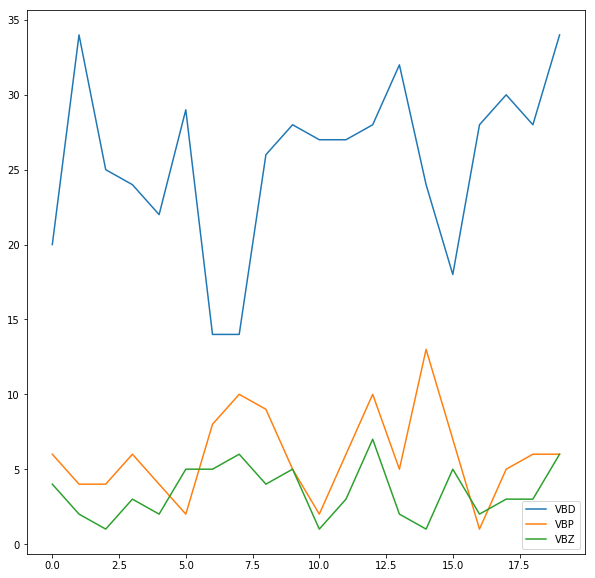

In [26]:
df = pd.DataFrame(counters).fillna(0)
df[['VBD', 'VBP', 'VBZ']].plot(figsize=(10,10))

In [34]:
# pos: Part Of Speech
# ('in','PRP')
# ('the','DET')
# ('__', 'NN')
def inTheNN(pairs):
    """ This function taks (token, POS) pairs and 
        looks for patterns like "in the house" 
    """
    matches = []
    for i, pair in enumerate(pairs):
        word = pair[0]
        pos = pair[1]
        if i < len(pairs)-3:
            nextWord = pairs[i+1][0]
            nextNextWord = pairs[i+2][0]
            nextNextPOS = pairs[i+2][1]
            if word == "in" and nextWord == "the" and nextNextPOS == "NN":
                matches.append([word, nextWord, nextNextWord])
    return matches

In [35]:
inTheNN(gardenTags)

[['in', 'the', 'direction'],
 ['in', 'the', 'eye'],
 ['in', 'the', 'eye'],
 ['in', 'the', 'house'],
 ['in', 'the', 'window'],
 ['in', 'the', 'effort'],
 ['in', 'the', 'lane'],
 ['in', 'the', 'garden'],
 ['in', 'the', 'mirror'],
 ['in', 'the', 'newspaper'],
 ['in', 'the', 'middle'],
 ['in', 'the', 'porch'],
 ['in', 'the', 'lane'],
 ['in', 'the', 'hollow'],
 ['in', 'the', 'gloom'],
 ['in', 'the', 'passage'],
 ['in', 'the', 'kitchen'],
 ['in', 'the', 'passage'],
 ['in', 'the', 'pillow']]

In [36]:
def likeANN(pairs):
    """ This function taks (token, POS) pairs and 
        looks for patterns like "in the house" 
    """
    matches = []
    for i, pair in enumerate(pairs):
        word = pair[0]
        pos = pair[1]
        if i < len(pairs)-3:
            nextWord = pairs[i+1][0]
            nextNextWord = pairs[i+2][0]
            nextNextPOS = pairs[i+2][1]
            if word == "like" and nextWord == "a" and nextNextPOS == "NN":
                matches.append([word, nextWord, nextNextWord])
    return matches

In [37]:
likeANN(gardenTags)

[['like', 'a', 'marquee'],
 ['like', 'a', 'work-girl'],
 ['like', 'a', 'picture'],
 ['like', 'a', 'shadow'],
 ['like', 'a', 'look']]

In [45]:
adjective=[]
for pair in gardenTags:
    word=pair[0]
    pos=pair[1]
    if pos.startswith('J'):
        adjective.append(word)
Counter=collections.Counter(adjective).most_common(20)
pd.DataFrame(C)

,0,1
0,little,23
1,big,8
2,dark,6
3,good,6
4,tall,5
5,last,5
6,such,5
7,young,5
8,poor,5
9,green,4
